In [1]:
import numpy as np
from quantum_logical.test_freq import Test_freq
import matplotlib.pyplot as plt


In [2]:
a = 5.06167
c = 4.16829
b = 4.54944
s = 4.27515
center = a - ((a - b) / 2)
def get_array(a, b, c, s, option, divisions):
    array = []
    array.clear()
    if option == 'scale center':
        center_freq = a - ((a - c) / 2)
        for i in range(divisions):
            new_a = a - (i/(divisions - 1)) * (a - center_freq)
            new_b = b + (i/(divisions - 1)) * np.abs(b - center_freq)
            new_c = c + (i/(divisions - 1)) * np.abs(c - center_freq)
            new_s = s + (i/(divisions - 1)) * np.abs(s - center_freq)
            array.append([new_a, new_b, new_c, new_s])
    elif option == 'snail scan':
        snail = np.linspace(a, c, divisions)
        for s in snail:
            array.append([a, b, c, s])
    elif option == 'ratio conservation':
        das = a - s
        dbs = b - s
        dcs = c - s
        per = np.linspace(0, 1, divisions)
        for p in per:
            a_new = (p * das) + s
            b_new = (p * dbs) + s
            c_new = (p * dcs) + s
            array.append([a_new, b_new, c_new, s])
    return array

In [3]:
freqs = get_array(a = a, b = b, c = c, s = s, option='scale center', divisions=15)
freqs[3]

[4.965950714285714, 4.563484285714286, 4.264009285714286, 4.347970714285714]

In [4]:
fids = []
fids.clear()
store = []
for i in range(len(freqs) - 1):
    res = Test_freq(freqs=freqs[i], store=store)
    fids.append(res)

Found overlap with eigenstate by 0.9954
0.9995480284927253
Found overlap with eigenstate by 0.9955
0.9257098667189314
Found overlap with eigenstate by 0.9955
0.7816970903631654
Found overlap with eigenstate by 0.9956
0.5397267741471308
Found overlap with eigenstate by 0.9957
0.3491331252585921
Found overlap with eigenstate by 0.9957
0.11930819174886784
Found overlap with eigenstate by 0.9958
0.029946177433171912
Found overlap with eigenstate by 0.9960
0.0500370754765473
Found overlap with eigenstate by 0.9961
0.10107069918114651
Found overlap with eigenstate by 0.9963
0.17708308863981911
Found overlap with eigenstate by 0.9966
0.10078733522303325
Found overlap with eigenstate by 0.9969
0.2461529036356249
Found overlap with eigenstate by 0.9975
0.07666064609095148
Found overlap with eigenstate by 0.9984
0.013977130968542556


In [5]:
# making the array of the jump toward middle coefficient 
sp = np.linspace(a-c, 0, 15)
re = list(reversed(sp[1:15]))
re

[0.0,
 0.06381285714285712,
 0.12762571428571423,
 0.19143857142857146,
 0.2552514285714287,
 0.3190642857142858,
 0.382877142857143,
 0.4466900000000002,
 0.5105028571428574,
 0.5743157142857146,
 0.6381285714285718,
 0.7019414285714289,
 0.7657542857142862,
 0.8295671428571433]

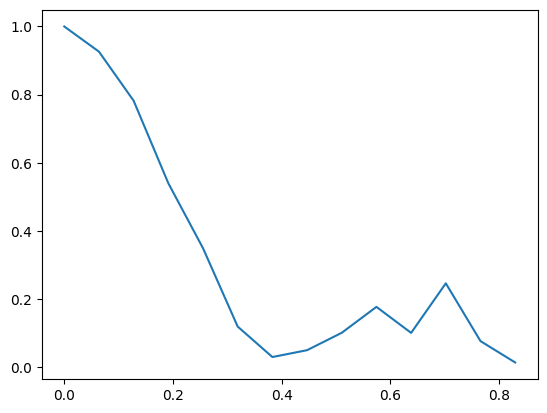

In [6]:
fig, ax = plt.subplots()
# this so far is for the moving towards the center plot without the application of optimization
ax.plot(re, store)

In [7]:
freqs = get_array(a = a, b = b, c = c, s = s, option='snail scan', divisions=15)
freqs

[[5.06167, 4.54944, 4.16829, 5.06167],
 [5.06167, 4.54944, 4.16829, 4.997857142857143],
 [5.06167, 4.54944, 4.16829, 4.934044285714286],
 [5.06167, 4.54944, 4.16829, 4.8702314285714285],
 [5.06167, 4.54944, 4.16829, 4.806418571428572],
 [5.06167, 4.54944, 4.16829, 4.742605714285714],
 [5.06167, 4.54944, 4.16829, 4.678792857142858],
 [5.06167, 4.54944, 4.16829, 4.61498],
 [5.06167, 4.54944, 4.16829, 4.5511671428571425],
 [5.06167, 4.54944, 4.16829, 4.487354285714286],
 [5.06167, 4.54944, 4.16829, 4.423541428571428],
 [5.06167, 4.54944, 4.16829, 4.359728571428572],
 [5.06167, 4.54944, 4.16829, 4.295915714285714],
 [5.06167, 4.54944, 4.16829, 4.232102857142857],
 [5.06167, 4.54944, 4.16829, 4.16829]]

In [8]:
fids = []
fids.clear()
store = []
store.clear()
for i in range(len(freqs)):
    res = Test_freq(freqs=freqs[i], store=store)
    fids.append(res)

Found overlap with eigenstate by 0.9943
0.031668061821305264
Found overlap with eigenstate by 0.9943
0.20960711493273887
Found overlap with eigenstate by 0.9942
0.4215073987325266
Found overlap with eigenstate by 0.9941
0.48338152315306776
Found overlap with eigenstate by 0.9939
0.5118767646169836
Found overlap with eigenstate by 0.9935
0.551357038733488
Found overlap with eigenstate by 0.9927
0.590029557487231
Found overlap with eigenstate by 0.9886
0.5531617033153834
Found overlap with eigenstate by 0.9993
0.060119030570741916
Found overlap with eigenstate by 0.9969
0.9023815369000029
Found overlap with eigenstate by 0.9961
0.9252831459742766
Found overlap with eigenstate by 0.9957
0.9573385624313451
Found overlap with eigenstate by 0.9955
0.9959576110341101
Found overlap with eigenstate by 0.9953
0.9591982856925457
Found overlap with eigenstate by 0.9952
0.48517051890693147


In [10]:
len(freqs) == len(fids)

True

In [13]:
# array of the snails motion
new_loc = []
new_loc.clear()
for i in range(len(freqs)):
    new_loc.append(np.abs(a - freqs[i][3]) * 1000)

new_loc

[0.0,
 63.81285714285756,
 127.62571428571422,
 191.43857142857178,
 255.25142857142845,
 319.06428571428603,
 382.8771428571427,
 446.6900000000003,
 510.5028571428578,
 574.3157142857145,
 638.1285714285721,
 701.9414285714287,
 765.7542857142863,
 829.5671428571429,
 893.3800000000006]

Text(0.5, 1.0, 'location of the snail with respect to qubit 1')

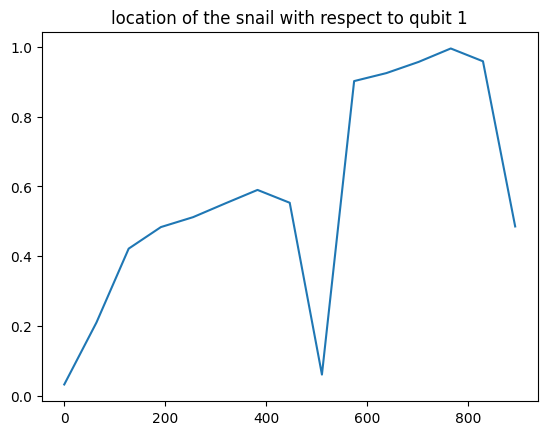

In [14]:
fig, ax = plt.subplots()
# this is the location of the snail 
# this is with no added detuning but that is not really necessary since this is kind of plain as day
# this so far is for the moving towards the center plot without the application of optimization
ax.plot(new_loc, store)
ax.set_title("location of the snail with respect to qubit 1")

In [15]:
freqs = get_array(a = a, b = b, c = c, s = s, option='ratio conservation', divisions=15)
freqs

[[4.27515, 4.27515, 4.27515, 4.27515],
 [4.33133, 4.294742142857142, 4.267517142857143, 4.27515],
 [4.38751, 4.314334285714286, 4.259884285714286, 4.27515],
 [4.44369, 4.333926428571429, 4.252251428571428, 4.27515],
 [4.4998700000000005, 4.353518571428571, 4.244618571428571, 4.27515],
 [4.55605, 4.373110714285714, 4.236985714285714, 4.27515],
 [4.61223, 4.392702857142857, 4.229352857142857, 4.27515],
 [4.66841, 4.412295, 4.2217199999999995, 4.27515],
 [4.72459, 4.431887142857143, 4.214087142857143, 4.27515],
 [4.78077, 4.451479285714285, 4.206454285714286, 4.27515],
 [4.83695, 4.471071428571428, 4.198821428571429, 4.27515],
 [4.89313, 4.490663571428572, 4.1911885714285715, 4.27515],
 [4.9493100000000005, 4.510255714285714, 4.183555714285714, 4.27515],
 [5.00549, 4.529847857142856, 4.175922857142857, 4.27515],
 [5.06167, 4.54944, 4.16829, 4.27515]]

In [16]:
fids = []
fids.clear()
store = []
store.clear()
for i in range(1, len(freqs)):
    res = Test_freq(freqs=freqs[i], store=store)
    fids.append(res)

Found overlap with eigenstate by 0.9984
0.00997346120784967
Found overlap with eigenstate by 0.9975
0.3159232911215493
Found overlap with eigenstate by 0.9970
0.09617837791218511
Found overlap with eigenstate by 0.9966
0.20578729747638302
Found overlap with eigenstate by 0.9963
0.2171511097845133
Found overlap with eigenstate by 0.9961
0.15009138406091838
Found overlap with eigenstate by 0.9960
0.029295305952842264
Found overlap with eigenstate by 0.9958
0.041967541200261776
Found overlap with eigenstate by 0.9957
0.13495007565605804
Found overlap with eigenstate by 0.9956
0.37406603895364393
Found overlap with eigenstate by 0.9956
0.56589973334036
Found overlap with eigenstate by 0.9955
0.7985552066273913
Found overlap with eigenstate by 0.9954
0.9319346408398937
Found overlap with eigenstate by 0.9954
0.9995480284927253


In [17]:
x_space = []
x_space.clear()
for i in range(len(freqs)):
    qubit1 = freqs[i][0]
    qubit2 = freqs[i][1]
    qubit3 = freqs[i][2]
    qubit1_qubit2 = np.abs(qubit1 - qubit2)
    qubit1_qubit3 = np.abs(qubit1 - qubit3)
    qubit2_qubit3 = np.abs(qubit2 - qubit3)
    if qubit1_qubit2 < qubit1_qubit3 and qubit1_qubit2 < qubit2_qubit3:
        x_space.append(qubit1_qubit2)
    elif qubit1_qubit3 < qubit1_qubit2 and qubit1_qubit3 < qubit2_qubit3:
        x_space.append(qubit1_qubit3)
    elif qubit2_qubit3 < qubit1_qubit2 and qubit2_qubit3 < qubit1_qubit3:
        x_space.append(qubit2_qubit3)

x_space

[0.02722499999999961,
 0.05445000000000011,
 0.08167500000000061,
 0.10890000000000022,
 0.13612499999999983,
 0.16335000000000033,
 0.19057500000000083,
 0.21779999999999955,
 0.24502499999999916,
 0.27224999999999966,
 0.29947500000000016,
 0.32669999999999977,
 0.3539249999999994,
 0.3811499999999999]

Text(0.5, 1.0, 'fidelity vs minimum separation between qubit-qubit gates')

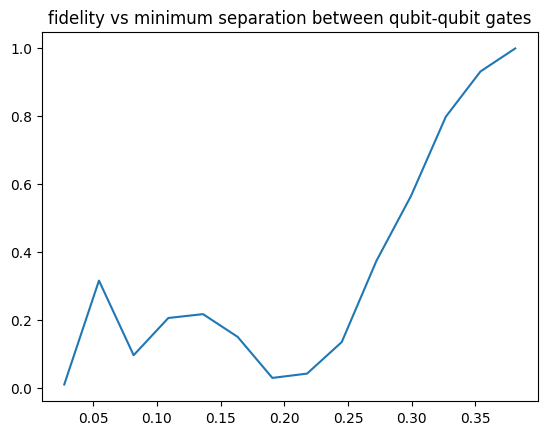

In [18]:
fig, ax = plt.subplots()
# this is the location of the snail 
# this is with no added detuning but that is not really necessary since this is kind of plain as day
# this so far is for the moving towards the center plot without the application of optimization
ax.plot(x_space, store)
ax.set_title("fidelity vs minimum separation between qubit-qubit gates")